In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = '/content/Coffee_sales.xlsx'
df = pd.read_excel(data)

In [ ]:
df.shape

(3547, 11)

In [ ]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
col_names = df.columns
col_names

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


In [ ]:
categorical = [var for var in df.columns if df[var].dtype == object]
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Time']


In [ ]:
df[categorical].head()

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Time
0,card,Latte,Morning,Fri,Mar,10:15:50.520000
1,card,Hot Chocolate,Afternoon,Fri,Mar,12:19:22.539000
2,card,Hot Chocolate,Afternoon,Fri,Mar,12:20:18.089000
3,card,Americano,Afternoon,Fri,Mar,13:46:33.006000
4,card,Latte,Afternoon,Fri,Mar,13:48:14.626000


In [ ]:
df[categorical].isnull().sum()

,0
cash_type,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Time,0


In [ ]:
df[categorical].isnull()

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Time
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3542,False,False,False,False,False,False
3543,False,False,False,False,False,False
3544,False,False,False,False,False,False
3545,False,False,False,False,False,False


In [ ]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

Series([], dtype: float64)


In [ ]:
for var in categorical:
  print(df[var].value_counts())

cash_type
card    3547
Name: count, dtype: int64
coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64
Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64
Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
Name: count, dtype: int64
Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Dec    259
Nov    259
May    241
Jul    237
Jun    223
Jan    201
Apr    168
Name: count, dtype: int64
Time
18:11:38.635000    1
10:15:50.520000    1
12:19:22.539000    1
12:20:18.089000    1
13:46:33.006000    1
                  ..
16:37:24.475000    1
14:38:35.535000    1
11:59:45.484000    1
10:41:41.249000    1
10:22:06.957000    1
Name: count, Length: 3547, dtype: int64


In [ ]:
for var in categorical:
    print(df[var].value_counts() / float(len(df)))

cash_type
card    1.0
Name: count, dtype: float64
coffee_name
Americano with Milk    0.228080
Latte                  0.213420
Americano              0.159008
Cappuccino             0.137017
Cortado                0.080913
Hot Chocolate          0.077812
Cocoa                  0.067381
Espresso               0.036369
Name: count, dtype: float64
Time_of_Day
Afternoon    0.339724
Morning      0.332957
Night        0.327319
Name: count, dtype: float64
Weekday
Tue    0.161263
Mon    0.153369
Fri    0.149986
Thu    0.143783
Wed    0.140964
Sat    0.132506
Sun    0.118128
Name: count, dtype: float64
Month_name
Mar    0.139273
Oct    0.120101
Feb    0.119256
Sep    0.096983
Aug    0.076685
Dec    0.073019
Nov    0.073019
May    0.067945
Jul    0.066817
Jun    0.062870
Jan    0.056668
Apr    0.047364
Name: count, dtype: float64
Time
18:11:38.635000    0.000282
10:15:50.520000    0.000282
12:19:22.539000    0.000282
12:20:18.089000    0.000282
13:46:33.006000    0.000282
                     ...

In [ ]:
for var in categorical:
  print(var,'contains',len(df[var].unique())),'labels'

cash_type contains 1
coffee_name contains 8
Time_of_Day contains 3
Weekday contains 7
Month_name contains 12
Time contains 3547


In [ ]:
df['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

,Year
0,2024
1,2024
2,2024
3,2024
4,2024


In [ ]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

,Month
0,3
1,3
2,3
3,3
4,3


In [ ]:
df['Date'] = df['Date'].dt.date
df['Date'].head()

,Date
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
 11  Year         3547 non-null   int32  
 12  Month        3547 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 332.7+ KB


In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time,Year,Month
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,10:15:50.520000,2024,3
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:19:22.539000,2024,3
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:20:18.089000,2024,3
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,13:46:33.006000,2024,3
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,13:48:14.626000,2024,3


In [29]:
numerical = [var for var in df.columns if df[var].dtype!=0]
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerica variables are:',numerical)

There are 12 numerical variables

The numerica variables are: ['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Time', 'Year', 'Month']


In [30]:
df[numerical].head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Time,Year,Month
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,10:15:50.520000,2024,3
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:19:22.539000,2024,3
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,12:20:18.089000,2024,3
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,13:46:33.006000,2024,3
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,13:48:14.626000,2024,3


In [31]:
print(round(df[numerical].describe(),2))

       hour_of_day    money  Weekdaysort  Monthsort     Year    Month
count      3547.00  3547.00      3547.00    3547.00  3547.00  3547.00
mean         14.19    31.65         3.85       6.45  2024.27     6.45
std           4.23     4.88         1.97       3.50     0.44     3.50
min           6.00    18.12         1.00       1.00  2024.00     1.00
25%          10.00    27.92         2.00       3.00  2024.00     3.00
50%          14.00    32.82         4.00       7.00  2024.00     7.00
75%          18.00    35.76         6.00      10.00  2025.00    10.00
max          22.00    38.70         7.00      12.00  2025.00    12.00


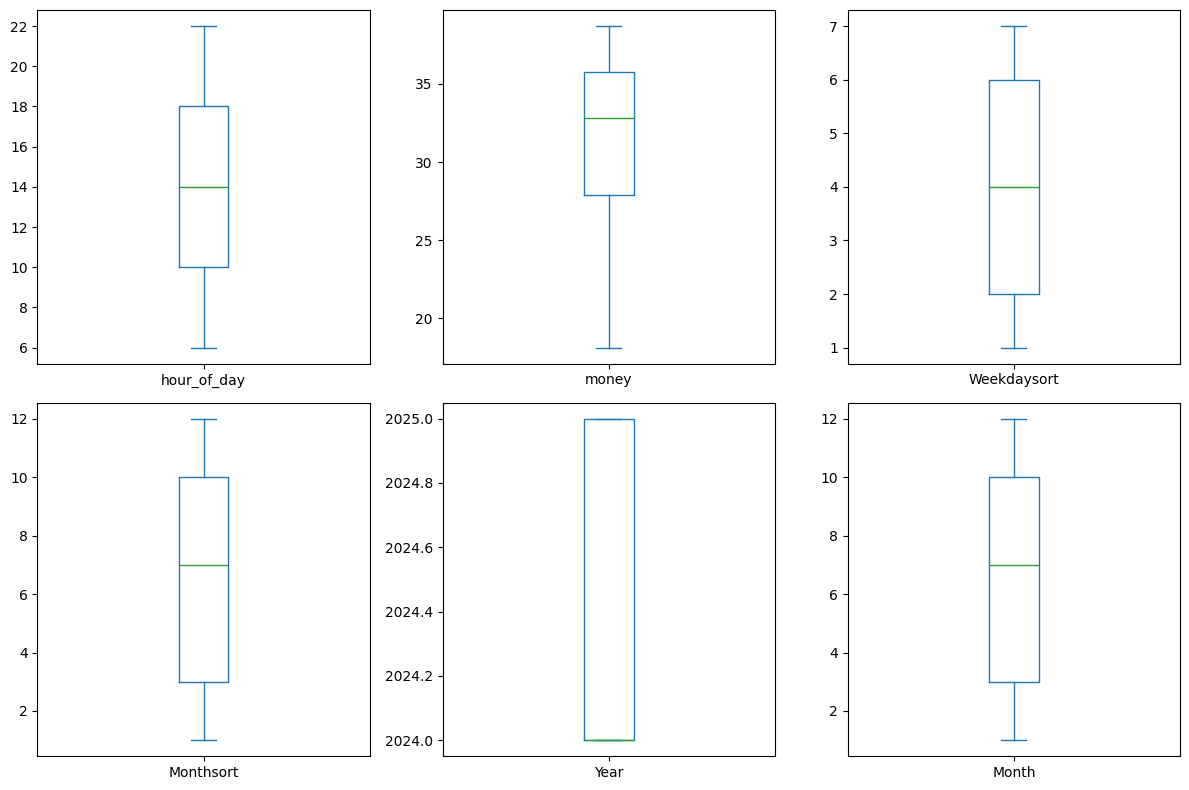

In [37]:
numerical = ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort', 'Year', 'Month']
df[numerical].plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 8), sharey=False)
plt.tight_layout()
plt.show()

In [46]:
x= df["hour_of_day"]
y= df["money"]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape, X_test.shape

((2837,), (710,))

In [52]:
X_train.dtypes

dtype('int64')

In [53]:
y_train.shape, y_test.shape

((2837,), (710,))

In [54]:
y_train.dtypes

dtype('float64')